## Sección 7: Módulo Seaborn para análisis de datos

<details>
<summary><b>📊 SEABORN</b></summary>

- **Seaborn** complementa a **Matplotlib** y se centra en la visualización de datos estadísticos.
- Funciona muy bien con **Pandas** para facilitar la creación de gráficos a partir de DataFrames.
  - Instalación: `pip install seaborn`

</details>

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

---
### Gráficos de distribución

In [5]:
propinas = sns.load_dataset('tips') # Cargar el dataset 'tips' de seaborn
propinas.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


**displot()**

<Axes: xlabel='total_bill', ylabel='Density'>

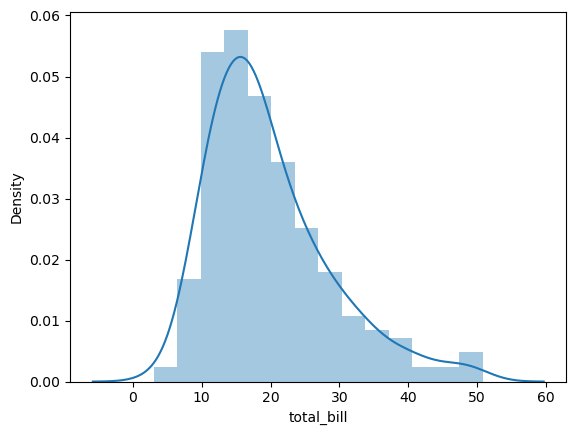

In [7]:
# displot() permite visualizar que incluye 3 formas de representar datos:
# - Histogramas
# - Kernel Density Estimation
# - Empirical cumulative distribution function
sns.distplot(propinas['total_bill'])

<Axes: xlabel='tip'>

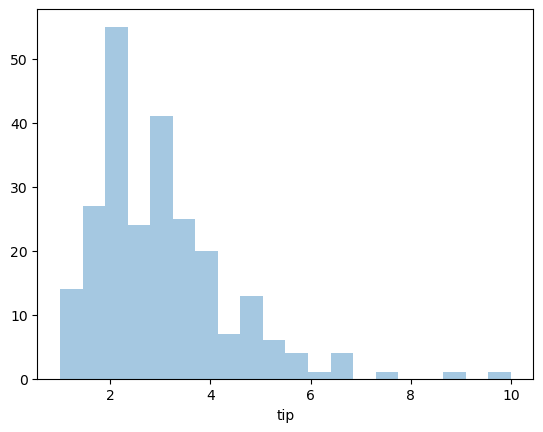

In [8]:
sns.distplot(propinas['tip'], kde=False, bins=20) # Eliminar la gráfica kde con 'kde=False'

**jointplot**

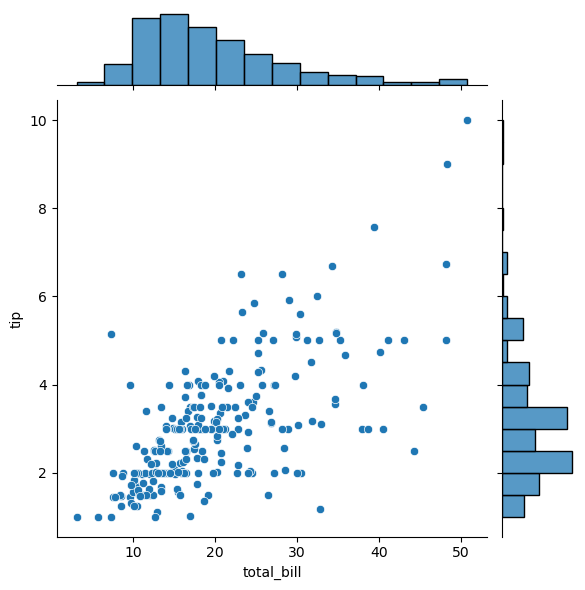

In [10]:
# jointplot() permite emparejar dos distplots para datos bivariados.
# 'kind' especifica el tipo de gráfico que se generará para mostrar la relación entre las variables:
# “scatter”, “reg”, “resid”, “kde”, “hex”

# Histogramas y scatter plot
sns.jointplot(x='total_bill',y='tip',data=propinas)

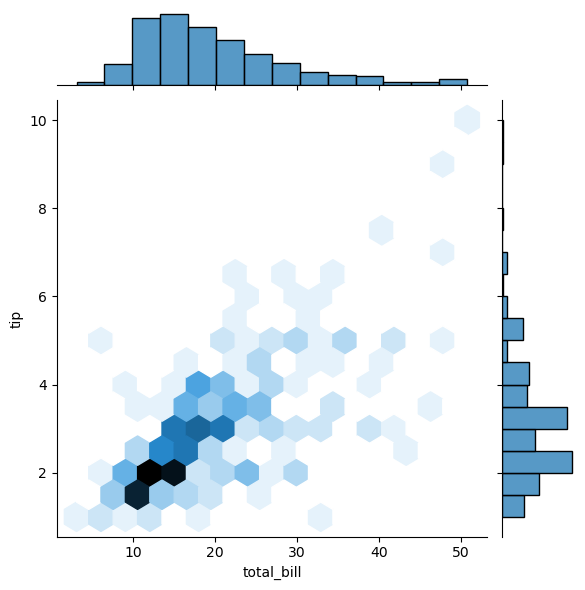

In [11]:
# Histogramas y hexagonal
sns.jointplot(x='total_bill',y='tip',data=propinas, kind='hex')

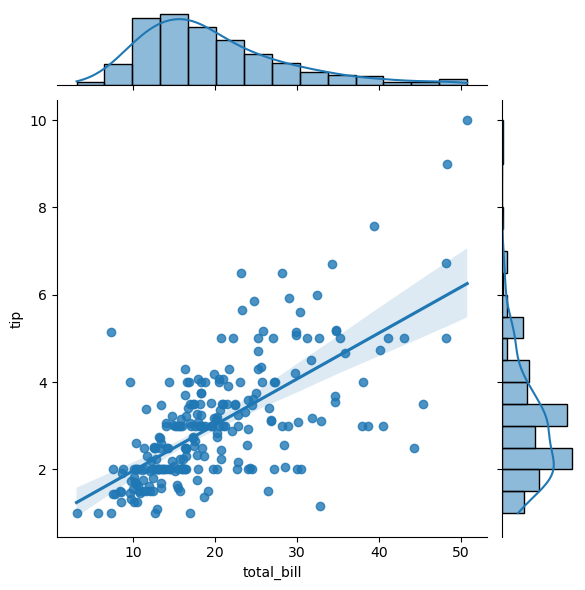

In [12]:
# Histogramas con kde y scatter plot
sns.jointplot(x='total_bill',y='tip',data=propinas, kind='reg')

**pairplot()**

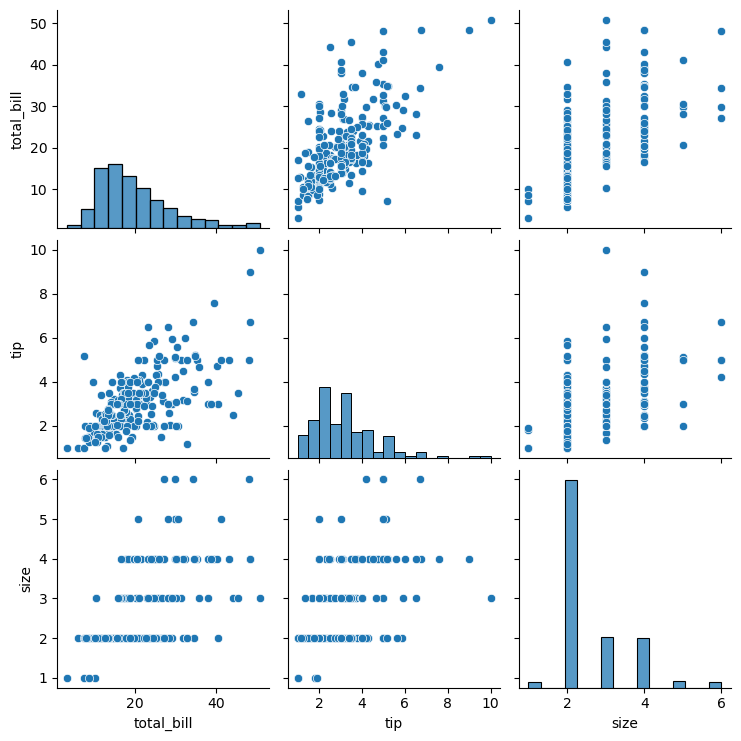

In [14]:
# pairplot() grafica las relaciones por pares entre todas las columnas numéricas de un dataframe.
# Soporta el parámetro 'hue' para colorear por una columna categórica.

# Datos numéricos
# Diagonal histogramas y los otros plots son scatter
sns.pairplot(propinas)

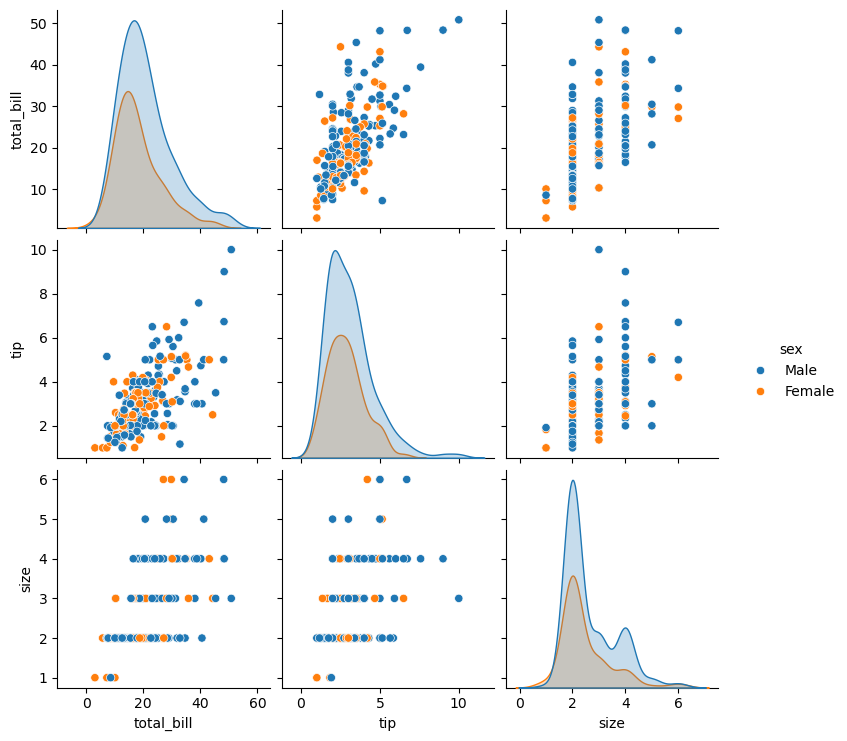

In [15]:
# Datos categóricos

# Diagonal KDE y los otros plots son scatter
sns.pairplot(propinas, hue='sex')

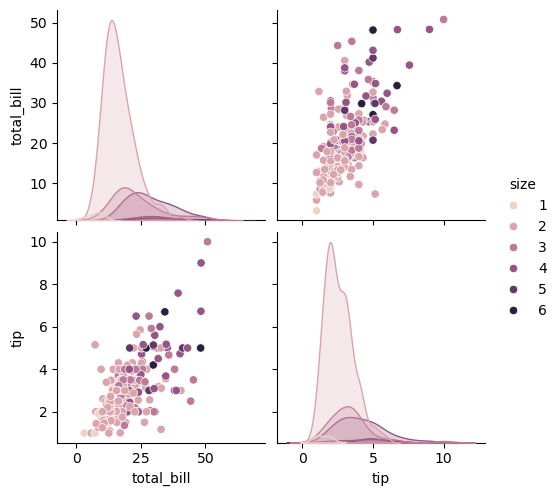

In [16]:
sns.pairplot(propinas, hue='size')

**rugplot()**

<Axes: xlabel='total_bill'>

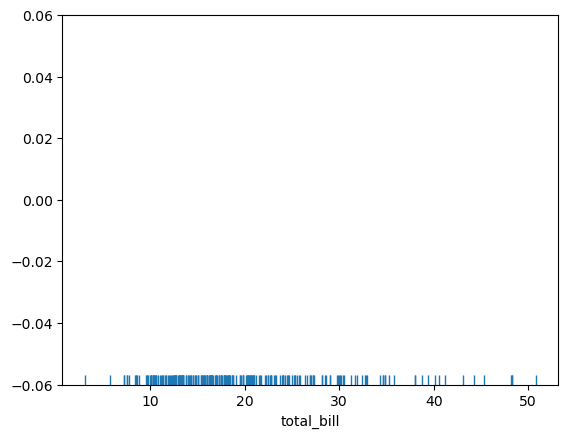

In [18]:
# Rugplot() cada línea vertical representa un valor individual en la distribución de 'total_bill'.
sns.rugplot(propinas['total_bill'])

<Axes: xlabel='tip'>

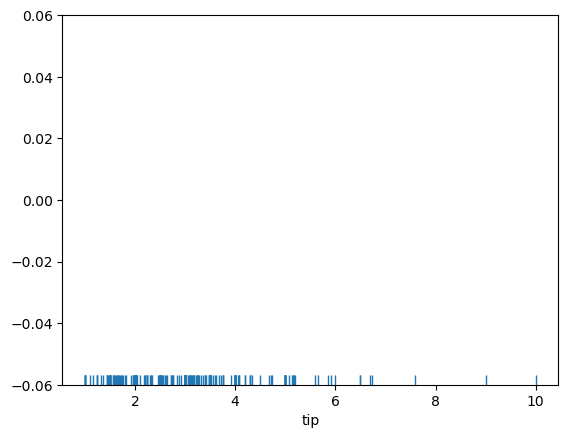

In [19]:
sns.rugplot(propinas['tip'])

---
### Gráficos para datos categóricos

In [21]:
propinas = sns.load_dataset('tips') # Cargar el dataset 'tips' de seaborn
propinas.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


**barplot()**

<Axes: xlabel='sex', ylabel='total_bill'>

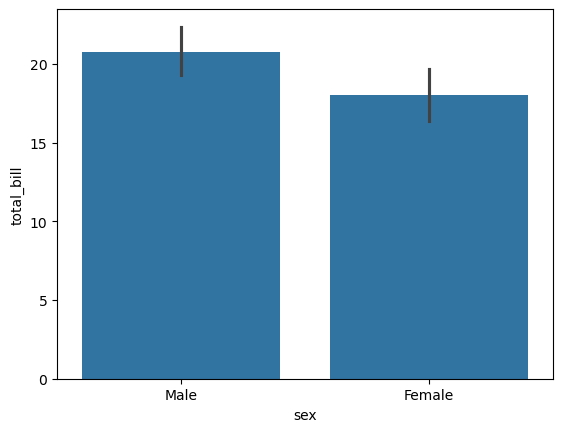

In [23]:
sns.barplot(x='sex',y='total_bill',data=propinas)

<Axes: xlabel='sex', ylabel='total_bill'>

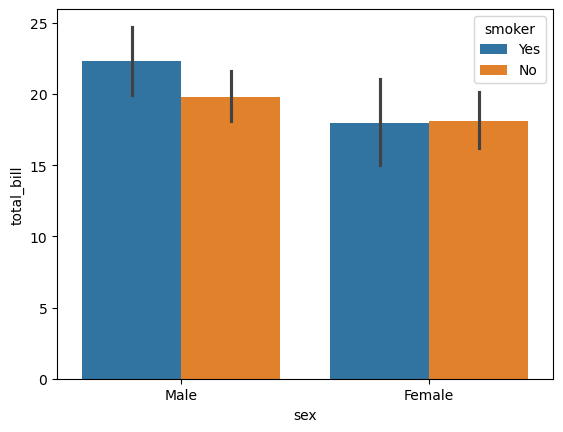

In [24]:
sns.barplot(x="sex", y="total_bill", hue="smoker", data=propinas)

**countplot()**

<Axes: xlabel='sex', ylabel='count'>

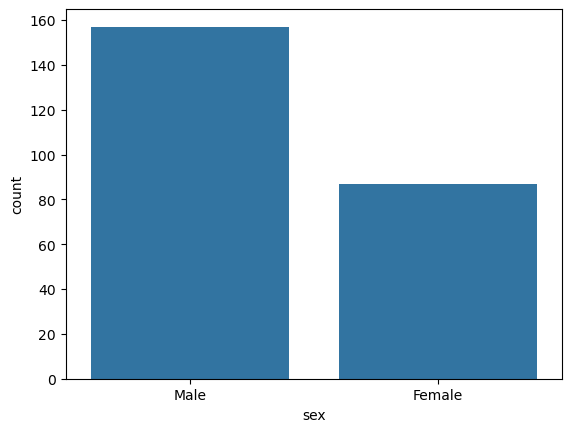

In [26]:
sns.countplot(x='sex',data=propinas)

**boxplot()**

<Axes: xlabel='day', ylabel='total_bill'>

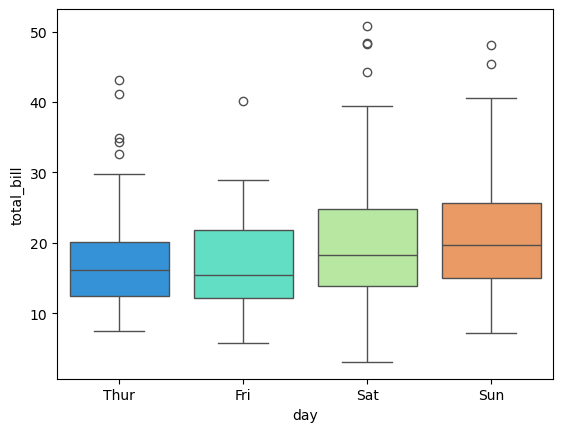

In [28]:
sns.boxplot(x='day',y='total_bill',data=propinas,palette='rainbow')

<Axes: xlabel='day', ylabel='total_bill'>

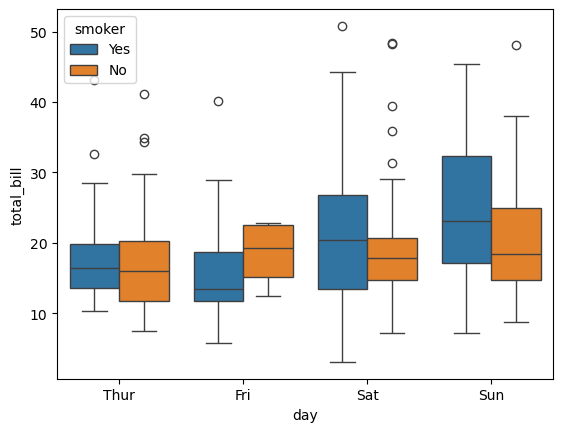

In [29]:
# ver varias variables (hue)
sns.boxplot(x='day',y='total_bill',data=propinas, hue='smoker')

**violinplot()**

<Axes: xlabel='day', ylabel='total_bill'>

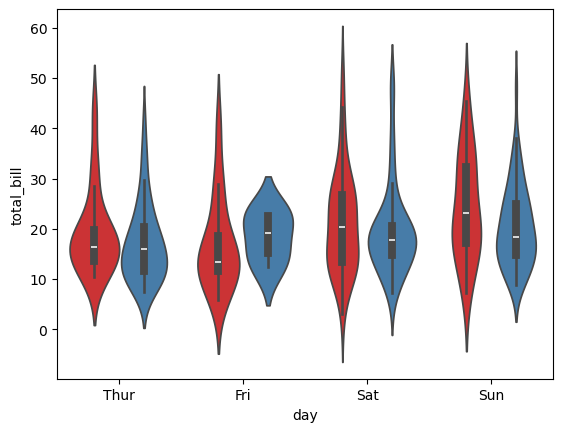

In [31]:
# 'hue' colorea los violines según la columna 'smoker'
sns.violinplot(x='day', y='total_bill', data=propinas, hue='smoker', palette='Set1', legend=False)

<Axes: xlabel='day', ylabel='total_bill'>

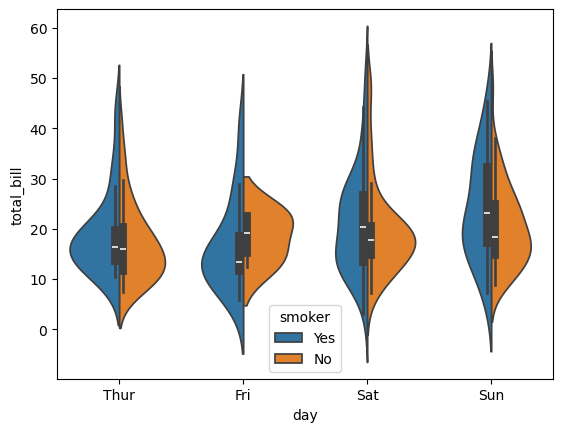

In [32]:
sns.violinplot(x='day',y='total_bill',data=propinas,hue='smoker',split=True) # 'split=True' divide los violines en el mismo gráfico según 'smoker'

**stripplot()**

<Axes: xlabel='day', ylabel='total_bill'>

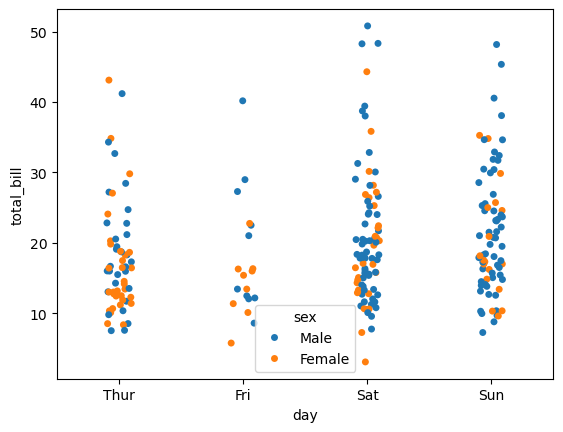

In [34]:
# stripplot() muestra una variable categórica en el eje x y una cuantitativa en el eje y, mostrando un punto por valor.
# El parámetro 'jitter' ajusta la posición de los puntos en el eje x para evitar que se solapen.

sns.stripplot(x='day', y='total_bill',data=propinas, hue='sex')

<Axes: xlabel='day', ylabel='total_bill'>

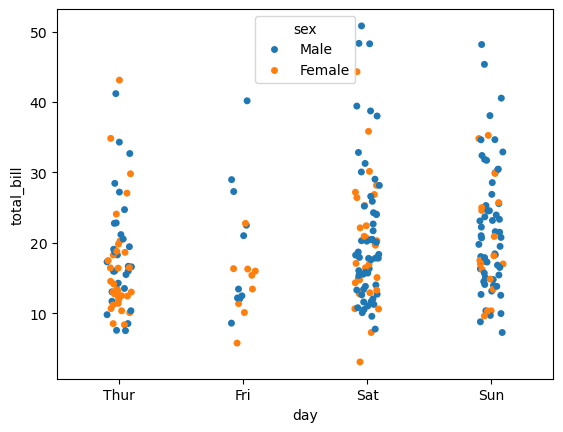

In [35]:
sns.stripplot(x='day', y='total_bill',data=propinas, hue='sex', jitter=True)

**swarmplot()**

<Axes: xlabel='day', ylabel='total_bill'>

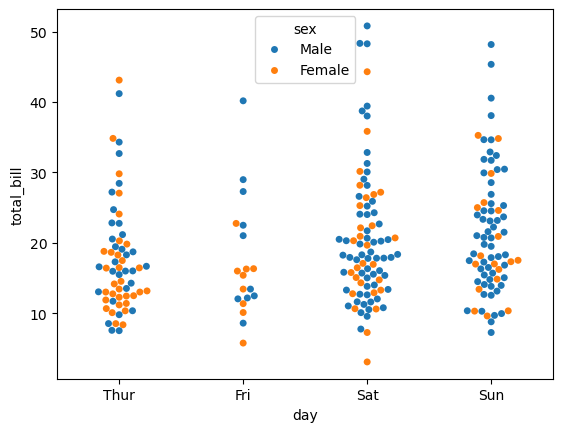

In [37]:
# swarmplot() similar a stripplot(), pero los puntos se ajustan a lo largo del eje categórico para que no se superpongan.
sns.swarmplot(x='day',y='total_bill',data=propinas,hue='sex')

**Combinando gráficos categóricos**

<Axes: xlabel='day', ylabel='total_bill'>

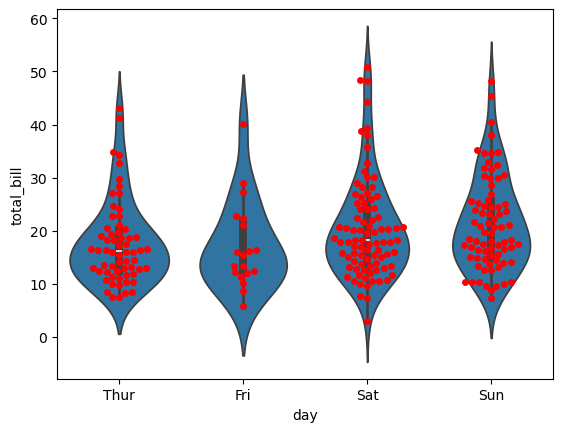

In [39]:
sns.violinplot(x='day',y='total_bill',data=propinas)
sns.swarmplot(x='day',y='total_bill',data=propinas, color='r')

---
### Mapas de calor (Heatmaps)

In [41]:
vuelos = sns.load_dataset('flights') # Cargar el dataset 'flights' de seaborn
vuelos.head(10)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
5,1949,Jun,135
6,1949,Jul,148
7,1949,Aug,148
8,1949,Sep,136
9,1949,Oct,119


In [42]:
# Para crear un mapa de calor, los datos deben estar en formato de matriz
vuelos_matrix = vuelos.pivot_table(values='passengers', index='month', columns='year')
vuelos_matrix

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
Feb,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
Mar,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
Apr,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0
Jun,135.0,149.0,178.0,218.0,243.0,264.0,315.0,374.0,422.0,435.0,472.0,535.0
Jul,148.0,170.0,199.0,230.0,264.0,302.0,364.0,413.0,465.0,491.0,548.0,622.0
Aug,148.0,170.0,199.0,242.0,272.0,293.0,347.0,405.0,467.0,505.0,559.0,606.0
Sep,136.0,158.0,184.0,209.0,237.0,259.0,312.0,355.0,404.0,404.0,463.0,508.0


<Axes: xlabel='year', ylabel='month'>

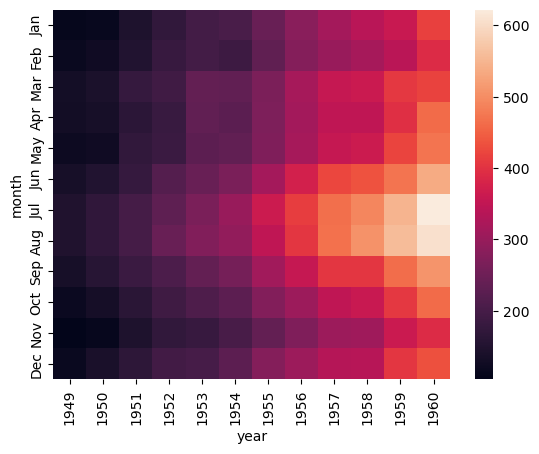

In [43]:
# La función heatmap() colorea la matriz de datos donde el color representa la intensidad del valor
sns.heatmap(vuelos_matrix)

<Axes: xlabel='year', ylabel='month'>

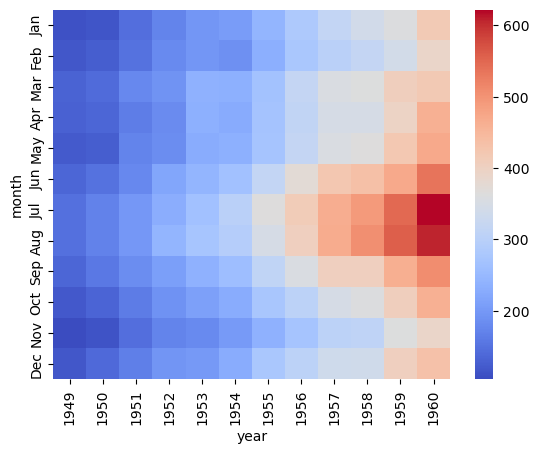

In [44]:
# Cambiando el mapa de colores
sns.heatmap(vuelos_matrix, cmap='coolwarm')

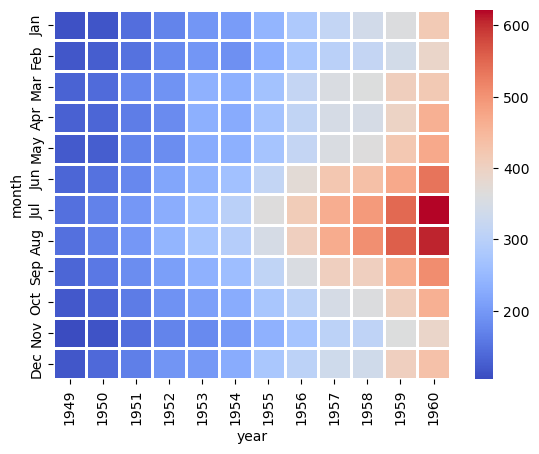

In [45]:
# Cambiando los parametros del colormap y el ancho y color de las lineas de division
sns.heatmap(vuelos_matrix, cmap='coolwarm', linecolor='white', linewidths=1);

---
### Gráficos de cuadrícula (grids): PairGrid y FacetGrid

In [69]:
flores = sns.load_dataset('iris') # Cargar el dataset 'iris' de seaborn
flores.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


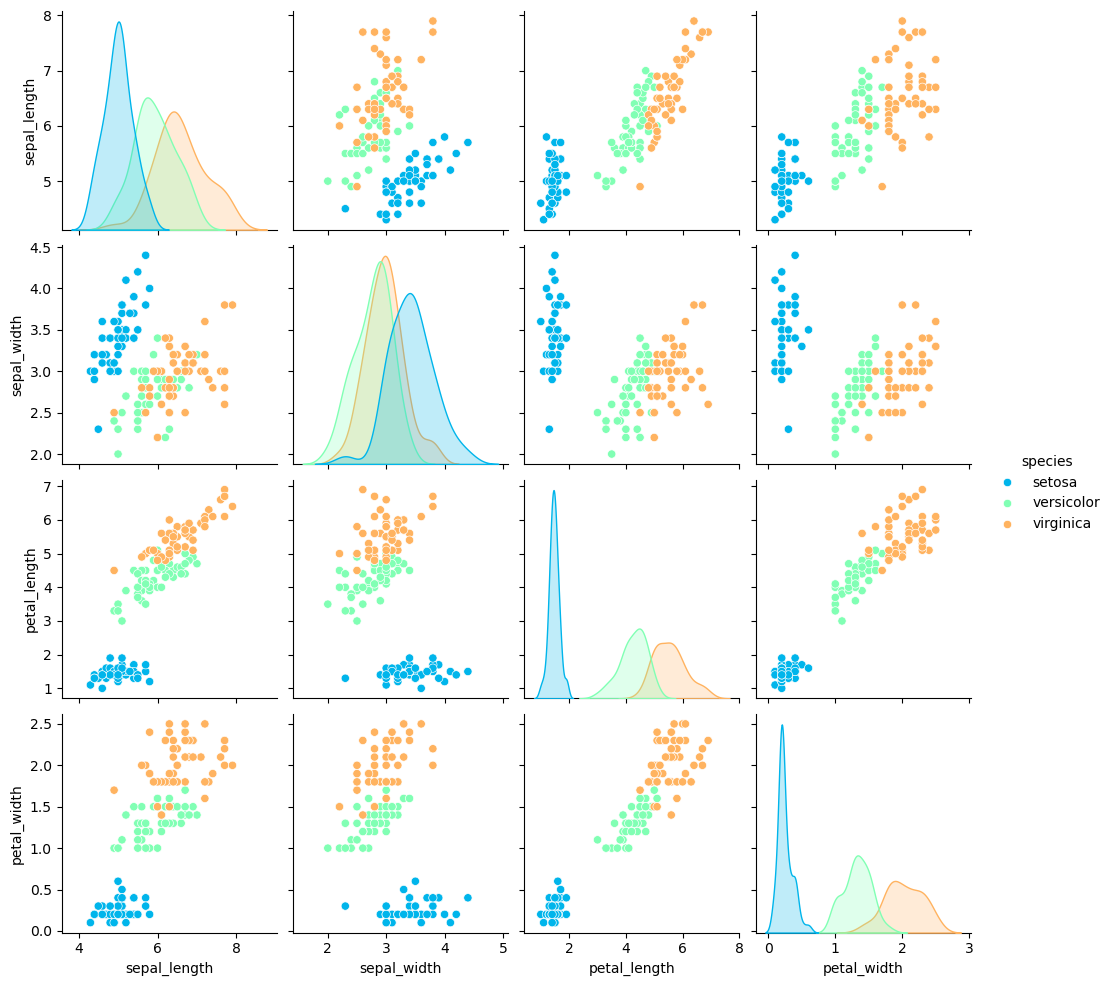

In [77]:
# paiplot() es una versión simple de PairGrid
# La diagonal es un histogramas, lo demás gráficos scatter
sns.pairplot(flores, hue='species', palette='rainbow')

**PairGrid**

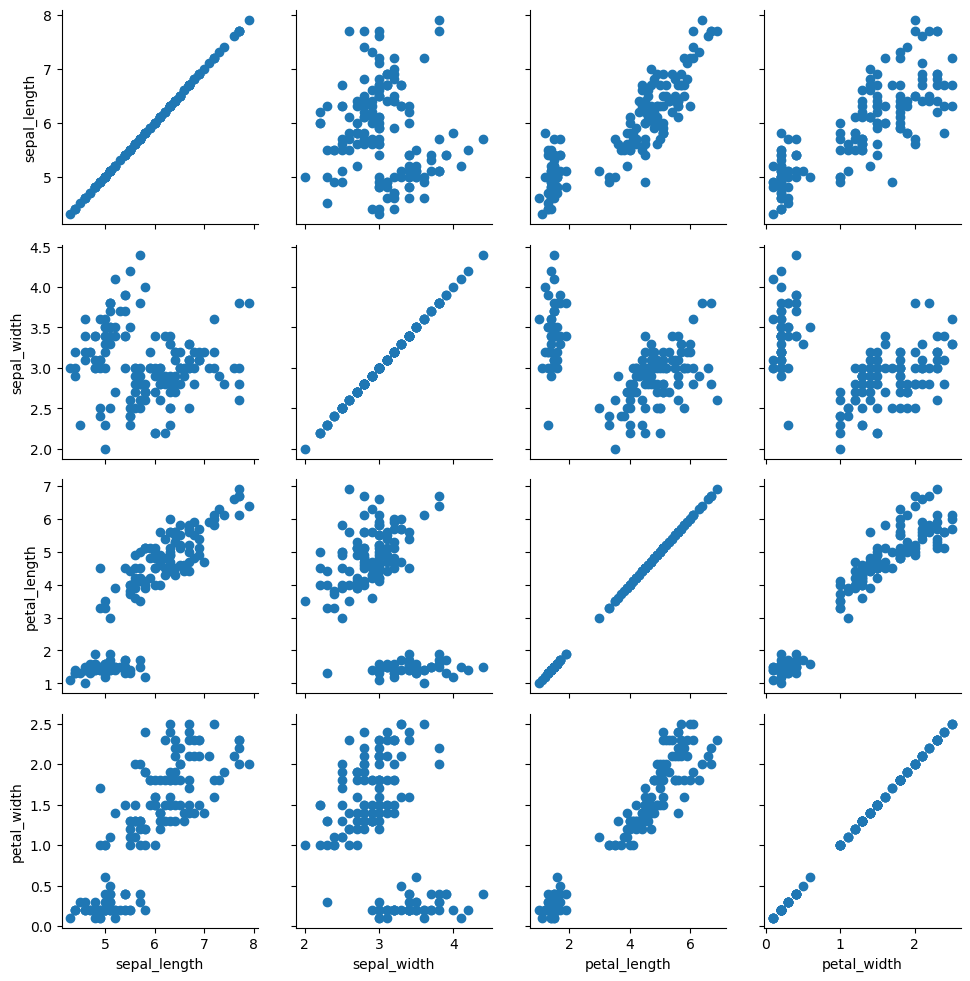

In [101]:
# PairGrid muestra gráficos que comparan dos variables a la vez, ayudando a ver cómo se relacionan entre sí.
# Es útil para ver todas las combinaciones posibles entre varias variables numéricas.

grafico = sns.PairGrid(flores)
grafico.map(plt.scatter)

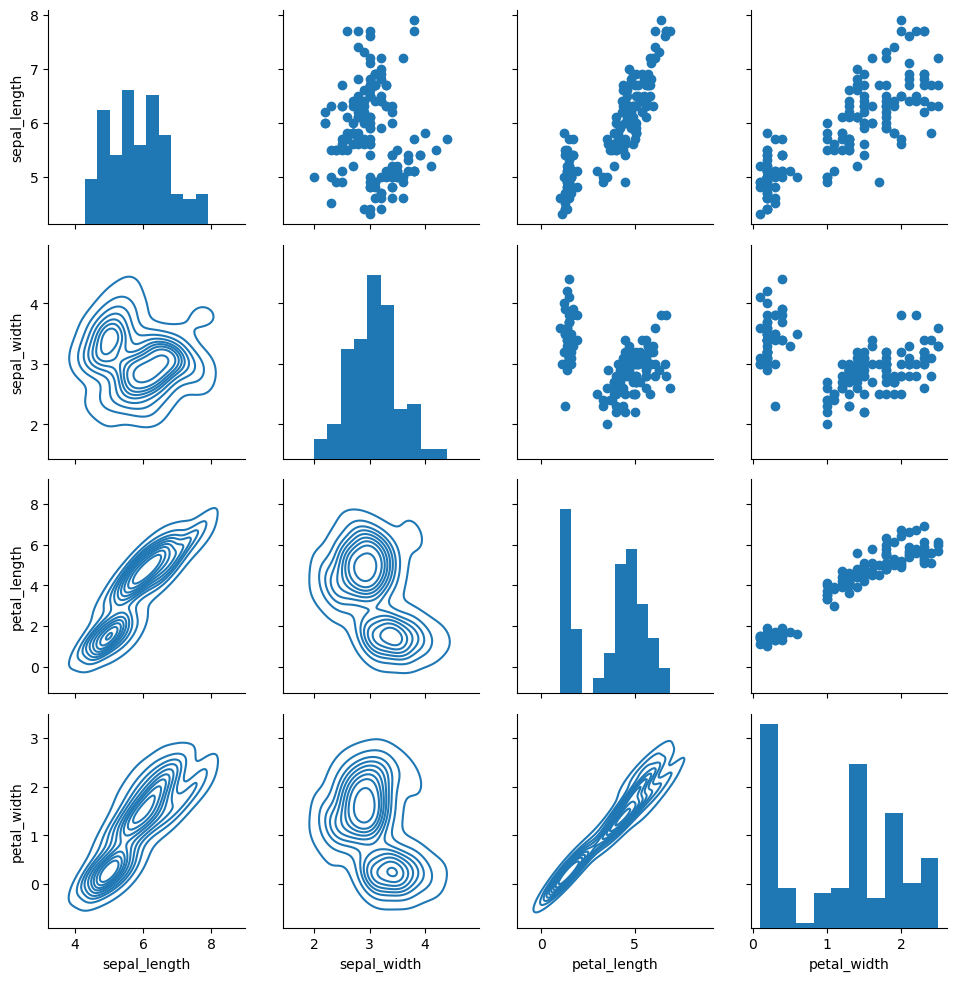

In [67]:
# Mapear arriba, abajo y diagonal
grafico = sns.PairGrid(flores) # crear una cuadricula
grafico.map_diag(plt.hist) #Histogramas en la diagonal
grafico.map_upper(plt.scatter) # Scatter plots en la parte superior
grafico.map_lower(sns.kdeplot); # Plots de densidad kde en la parte inferior

**FacetGrid**

In [103]:
# FacetGrid divide los gráficos según categorías, mostrando un gráfico para cada grupo de datos.
# Es útil para comparar cómo cambian las relaciones entre variables en diferentes grupos.

propinas = sns.load_dataset('tips')
propinas.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [87]:
propinas['time'].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

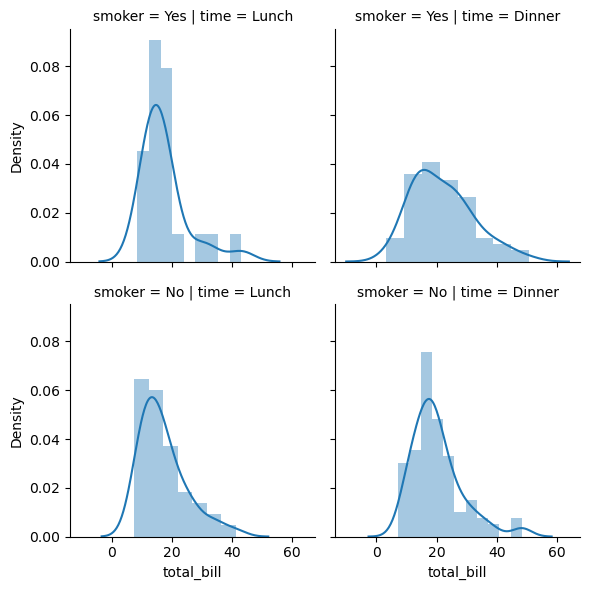

In [105]:
# histogramas entre las dos variables
graficos2 = sns.FacetGrid(data=propinas, col='time', row='smoker')
graficos2.map(sns.distplot, 'total_bill')

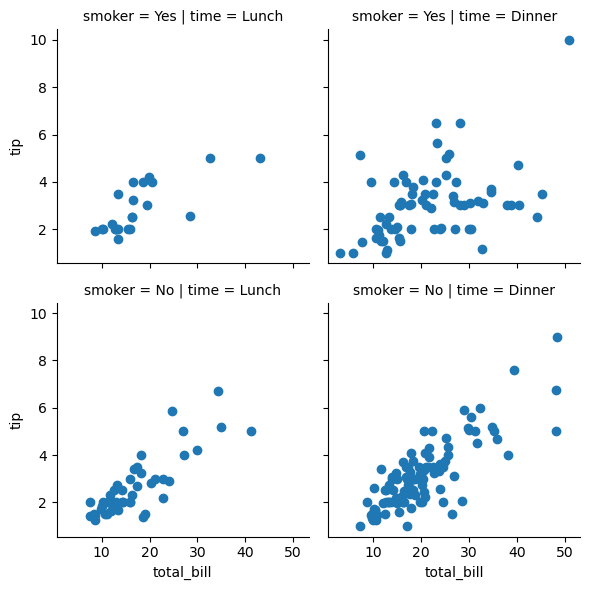

In [107]:
# Scatterplots
graficos2 = sns.FacetGrid(data=propinas, col='time', row='smoker')
graficos2.map(plt.scatter, 'total_bill', 'tip')

---
### Gráficos de regresión (Regression Plots)

In [163]:
propinas = sns.load_dataset('tips')

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


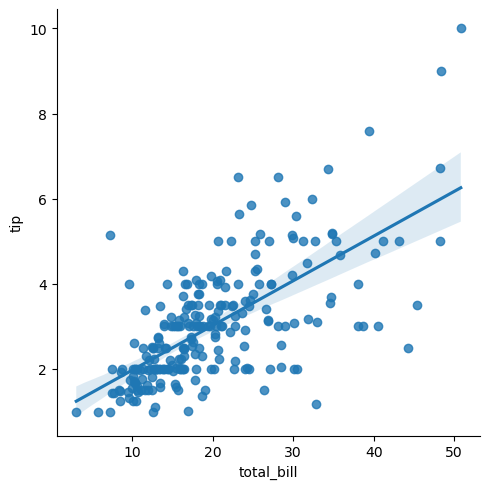

In [165]:
# lmplot permite visualizar modelos lineales, pero también dividir los gráficos o colorear el tono (hue) en función de las características

# scatter plot más la regresión lineal
sns.lmplot(data=propinas, x='total_bill', y='tip')

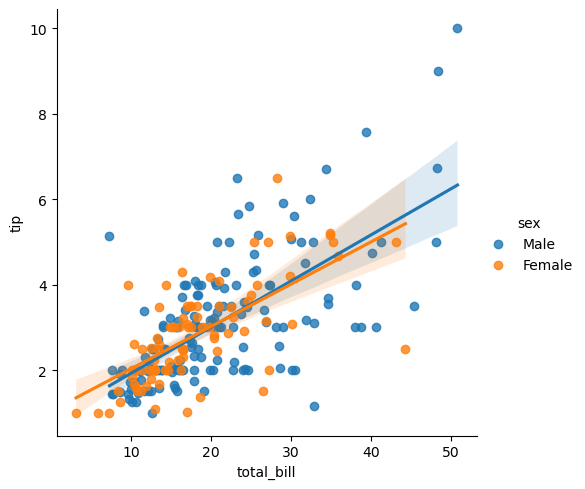

In [167]:
# scatter plot mas la regresion lineal basado en el genero
sns.lmplot(data=propinas, x='total_bill', y='tip', hue='sex')

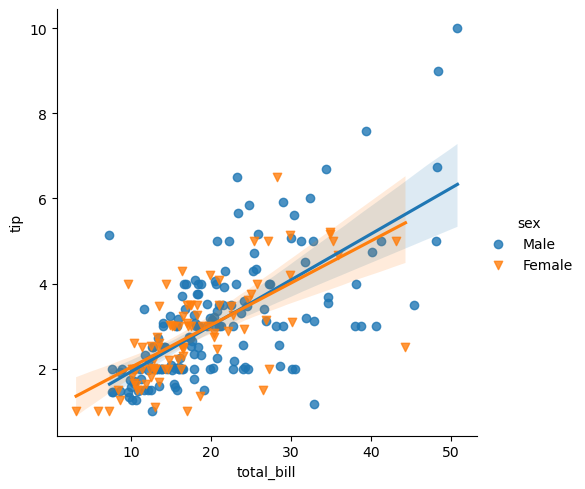

In [169]:
# Usando marcadores
sns.lmplot(data=propinas, x='total_bill', y='tip', hue='sex', markers=['o','v'])

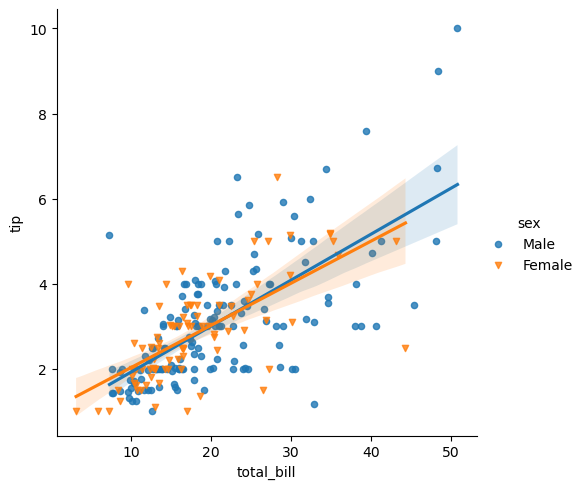

In [171]:
# Personalizar el tamaño de los marcadores
sns.lmplot(data=propinas, x='total_bill', y='tip', hue='sex', markers=['o','v'], scatter_kws={'s':20})

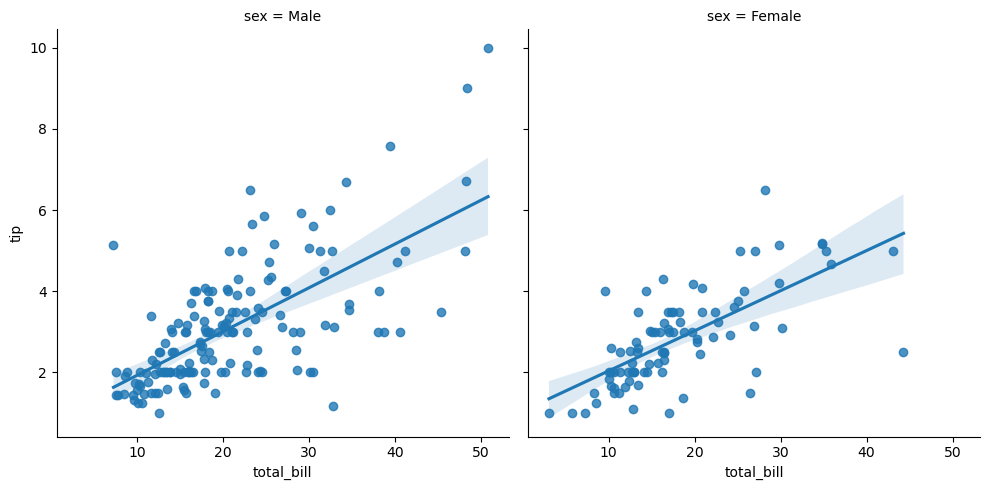

In [198]:
# Usamos los argumentos 'col' y 'row' para crear una cuadrícula (grid) de gráficos
sns.lmplot(x='total_bill', y='tip', data=propinas, col='sex') # división por el género

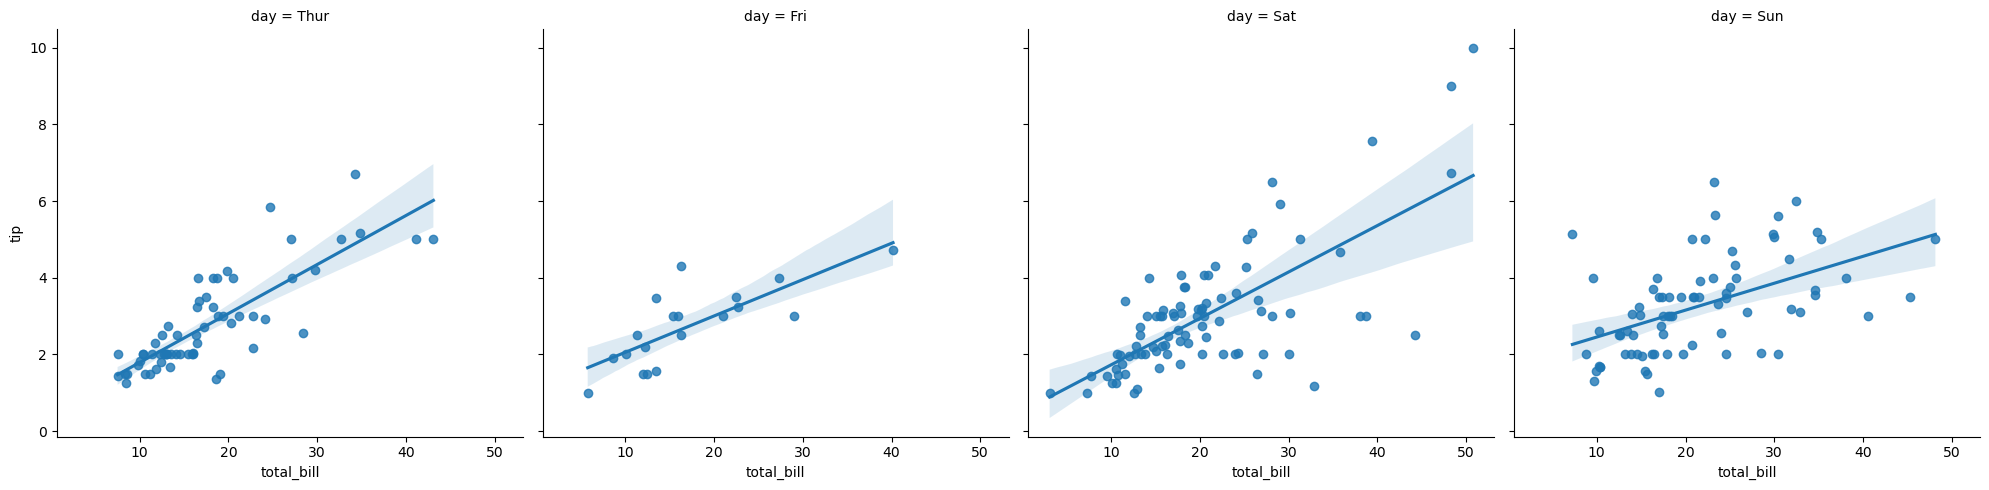

In [191]:
sns.lmplot(x='total_bill', y='tip', data=propinas, col='day')

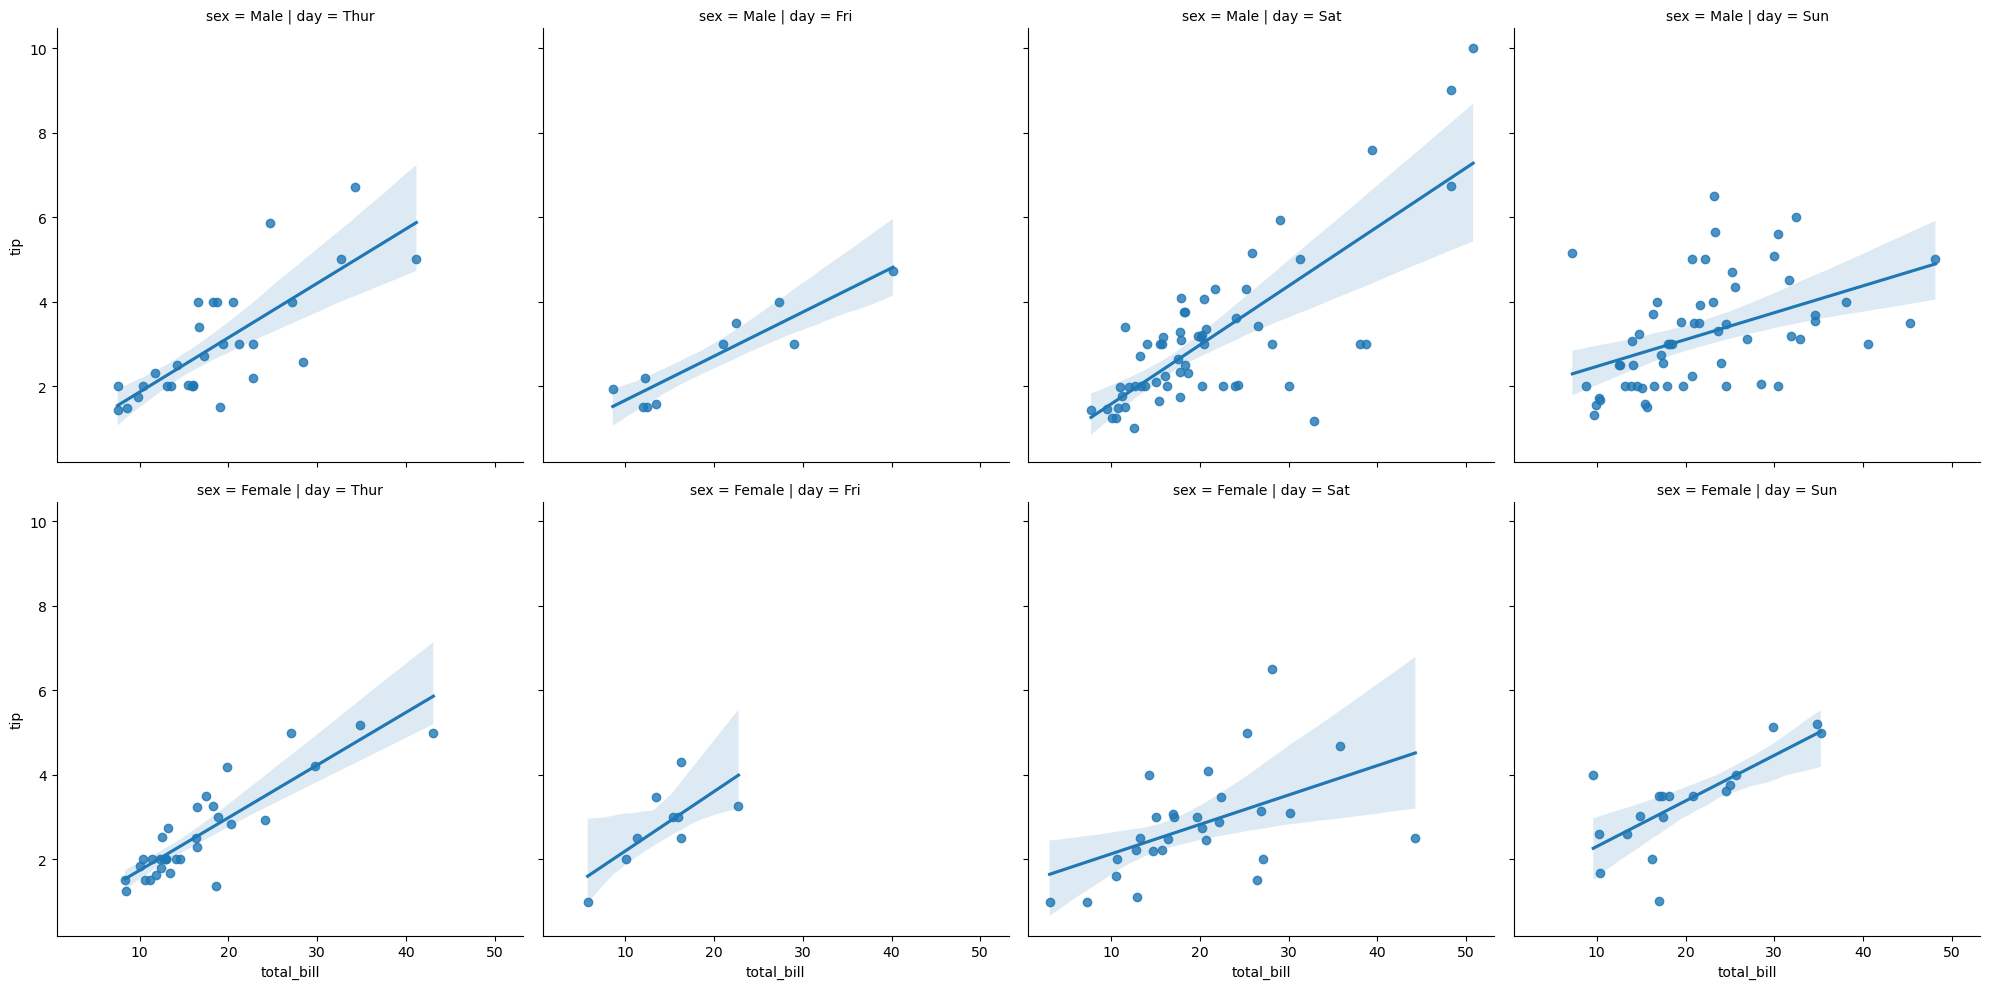

In [200]:
# división por género y día
sns.lmplot(x='total_bill', y='tip', data=propinas, col='day', row='sex')

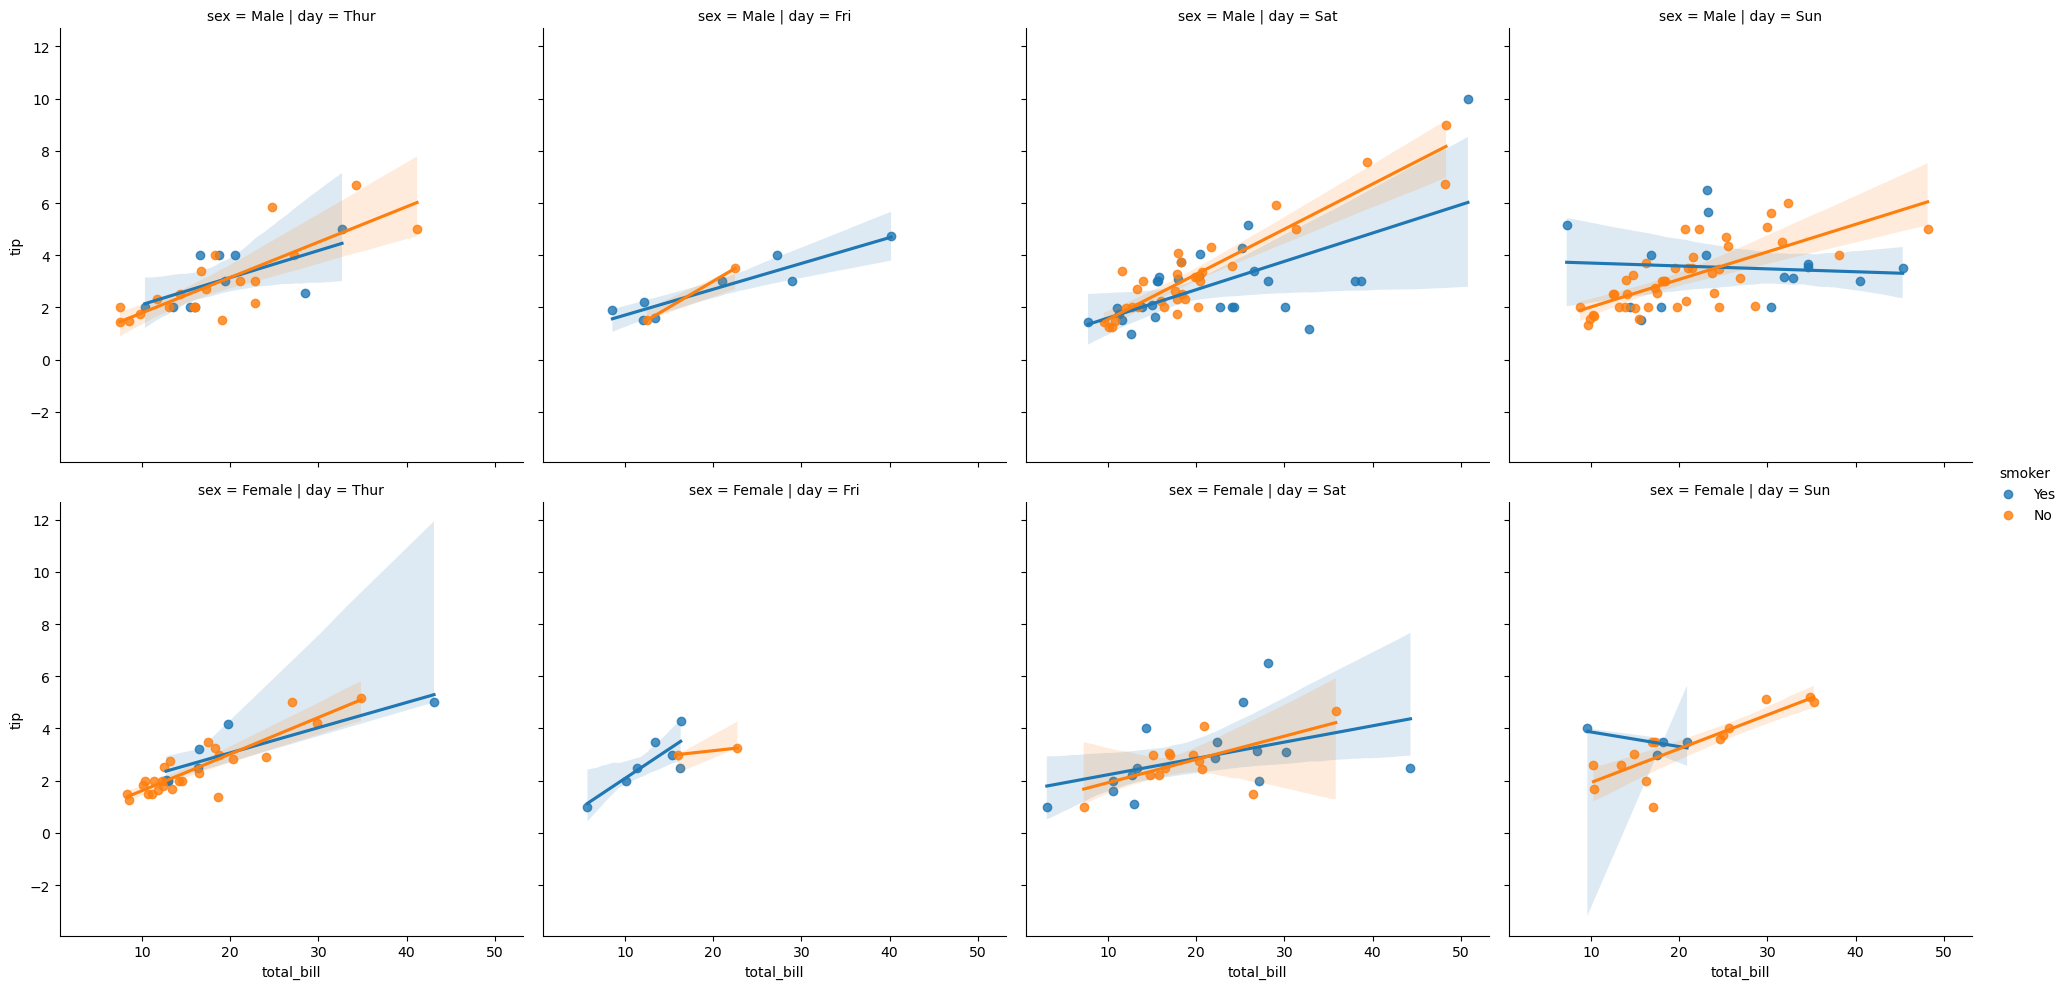

In [196]:
sns.lmplot(x='total_bill', y='tip', data=propinas, col='day', row='sex', hue='smoker')

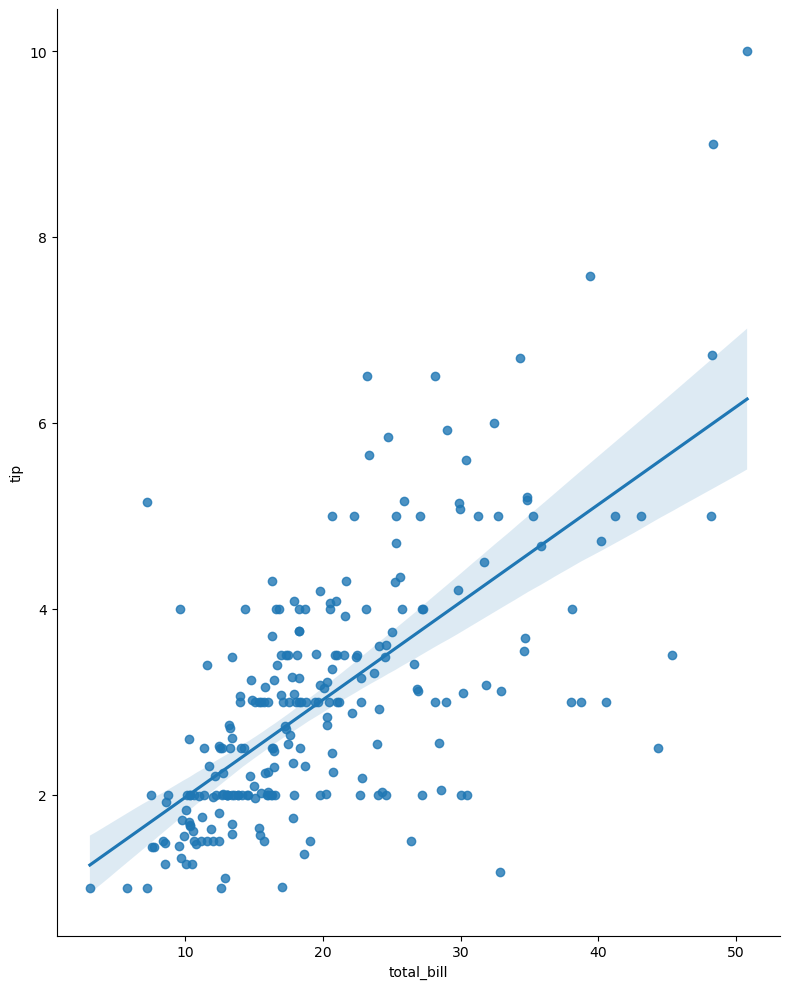

In [202]:
# Ajustar relación de aspecto y tamaño
sns.lmplot(data=propinas, x='total_bill', y='tip', aspect=0.8, height=10)

---
### Estilos y colores

In [207]:
propinas = sns.load_dataset('tips')
propinas.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


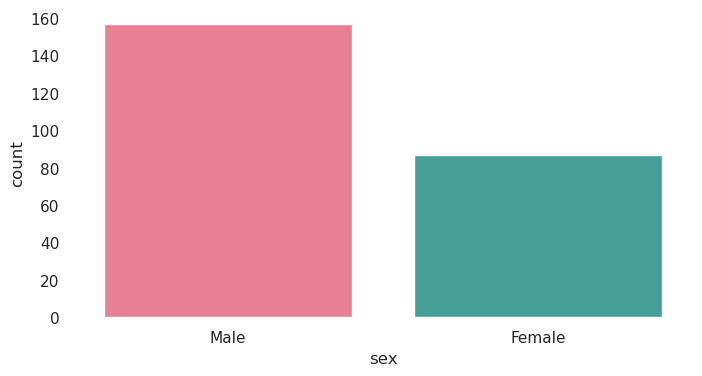

In [289]:
sns.set_context('notebook', font_scale=1) # Tamaño de la fuente
plt.figure(figsize=(8,4)) # Tamaño de la figura
sns.set_style('white') # Estilo de la figura
sns.countplot(data=propinas, x='sex', palette='husl')
sns.despine(left=True, bottom=True) # Quita los bordes

<Axes: xlabel='sex', ylabel='count'>

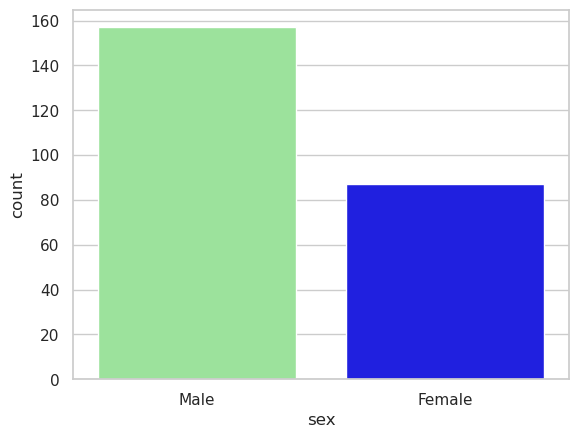

In [273]:
# https://seaborn.pydata.org/tutorial/color_palettes.html
colores = ['lightgreen', 'blue']
sns.countplot(data=propinas, x='sex', palette=colores)